In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload

In [67]:
autoreload 2

In [77]:
import matplotlib.pyplot as plt
from scipy import stats, optimize
import numpy as np
import sympy as sym

import inputs
import models
import shooting

from __future__ import division
#from sympy import init_printing

In [78]:
from estimation_class import *

# Estimation for Spain

## Production function:

### $$ A_s * Big A * (\omega_A  * x^{\frac{\sigma-1}{\sigma}}+(1-\omega_A)  * y^{\frac{\sigma-1}{\sigma}} )^{\frac{\sigma}{\sigma-1}} * l^{\omega_B} * r^{(1-\omega_B)} $$

**Parameter restrictions**:
- $\omega_B > \omega_A $: This makes sure that bigger firms hire better workers.
- $\sigma < 1 $: This ensures PAM.

Finally, $A_s$ is a scaling factor for $Big A$. As  $Big A$ can get quite big, for the minimizing routine it is best to first scale it up by A_s and then letting the minimization work with similar quantities as the parameters.

###This imports the code, stores the data and dispalys it:

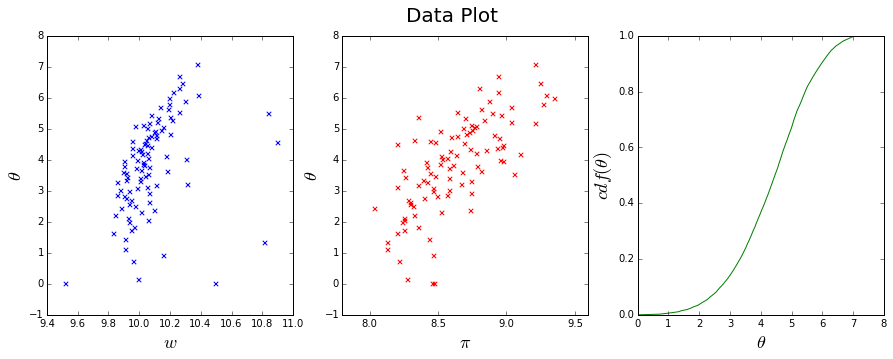

In [102]:
est1 = HTWF_Estimation((0.0,1.0), (0.005, 20.0), (0.0,1.0), (0.005, 20.0), 142.85, 100000.0)
est1.InitializeFunction()
est1.import_data('SPA05.csv', ID=False, weights=False, logs=False, yearly_w=True)
est1.Plot_data()

So we have:

- A relationship between (annual) log wages and log firm size.
- A relationship between (annual) log wages and log firm size.
- A distribution of log firm size.

The model spits out:
- A function that relates $wage \to \theta$ (not in logs, we take them when calculating the error)
- A function that relates $wage \to \pi$ (not in logs, we take them when calculating the error) 
- The gridgpoints of $x$ with their corresponding $\theta$s. From there we build the distribution via:$ \frac{pdf(x_i)}{\theta_i} = pdf(\theta_i)$ (plus take logs and normalize)


### The objective function:

##$$ min_{{\omega_A,\omega_B,\sigma,Big_A}} \sum_i{(\theta_i - \hat\theta_i(wage_i))^2 + (\theta_i - \hat\theta_i(pi_i))^2 + (cdf_{\theta}(\theta_i) - \hat{cdf}_{\theta}(\theta_i))^2}$$

There is a penalty of **100.0** for not having some points in the solution (so data points smaller than the smallest size from the model or data points bigger than the biggest size from the model). We can chenge this in the future.

### The following puts everything into the minimization routine

About the minimization routine, this is the best one we've found so far in python. It takes a while because you can't simply take derivatives of the objective function. Next week we'll look up altertives / ways to make the solver faster and more precise.

In [91]:
ps = (0.6,0.7,0.99,1.0)
res = optimize.minimize(est1.StubbornObjectiveFunction, 
                        ps,args=(2000, 1e-3, 1e4), 
                        method='L-BFGS-B', jac=None, hess=None, hessp=None, 
                        bounds=((1e-3,1.0-1e-3),(1e-3,1.0-1e-3),(1e-3,1.0-1e-3),(0.5,2.0)), options={'eps':1e-2})

Success! All workers and firms are matched
errors: 1803.62500776 243.569847057 412.159775108
2459.35462992 [ 0.6   0.7   0.99  1.  ]
Success! All workers and firms are matched
errors: 2304.08348559 227.392405477 405.295133406
2936.77102447 [ 0.61  0.7   0.99  1.  ]
Success! All workers and firms are matched
errors: 1403.0849219 265.220501934 410.775326626
2079.08075046 [ 0.6   0.71  0.99  1.  ]
Wrong assortativity  [ 0.6  0.7  1.   1. ] Approximated solution failed to satisfy required assortativity condition.
Success! All workers and firms are matched
errors: 1803.62500774 243.895385938 410.709736693
2458.23013037 [ 0.6   0.7   0.99  1.01]
OK JUST LEAVE IT [  1.00000000e-03   9.99000000e-01   1.00000000e-03   2.00000000e+00] error: Profit should be non-negative!
OK JUST LEAVE IT [  1.10000000e-02   9.99000000e-01   1.00000000e-03   2.00000000e+00] error: Profit should be non-negative!
OK JUST LEAVE IT [  1.00000000e-03   1.00900000e+00   1.00000000e-03   2.00000000e+00] error: Profit s

In [92]:
res

  status: 2
 success: False
    nfev: 780
     fun: 864.57256930070548
       x: array([ 0.52826497,  0.756881  ,  0.8482356 ,  1.14173746])
 message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     jac: array([ 7589.01462459,  1590.86770165,   833.81356146,   -68.48028541])
     nit: 7

Although this particular run didn't succeed, I have one case of success. The lowest point so far is is given by:

$$ \omega_A :0.529682757, \omega_B :0.757289788, \sigma_A :0.851239014, Big_A :1.15173746 $$

Below is represented the fit to the data.

In [97]:
F_params = {'omega_A':0.529682757, 'omega_B':0.757289788, 'sigma_A':0.851239014, 'Big_A':1.15173746}
functions_f_model = est1.Solve_Model(F_params, 2000.0, 'lsoda', 1e4, 1e-3)
est1.Calculate_MSE(functions_f_model)

Success! All workers and firms are matched
errors: 0.185375571641 533.467219067 329.942525553


863.59512019120052

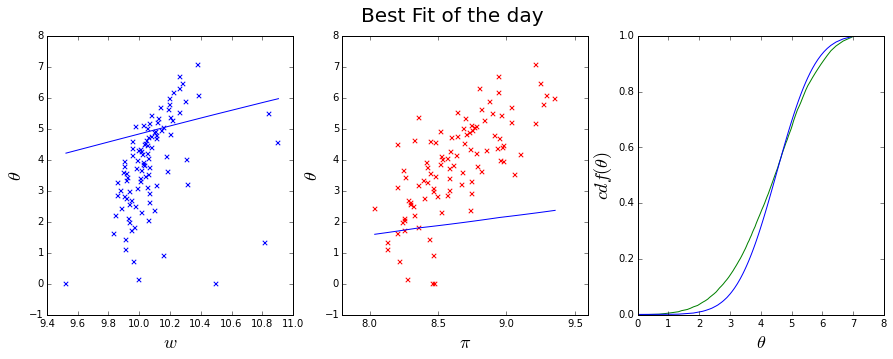

In [98]:
est1.Plot_solution()

Note: remember that everythging is in logs, so althought the functions from the model seem linear, they are not.

Not a great job for profits and wages (wages from the model tend to be way smaller than profits, and in may data the profit is the "retribution to the entrepreneur" - which is a salary to him at the end of the day. The distribution of firm sizes is pretty good. The median seems to be a hit.